<h1>Forecasting number of Air Passengers for next 10 years</h1>

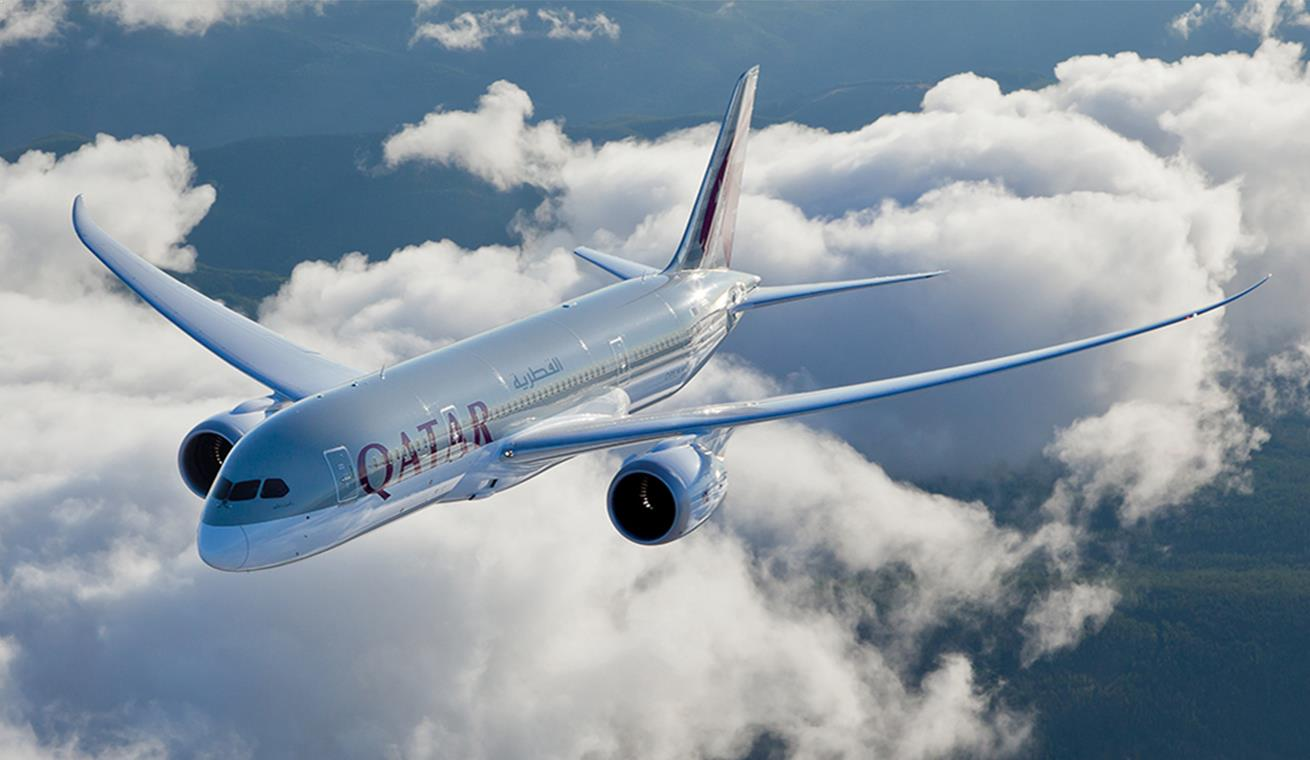

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

rcParams['figure.figsize'] = 10, 6

- Reading the dataset file and checking the size of file

In [2]:
dataset=pd.read_csv('AirPassengers.csv')

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])
indexedDataset.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


- Visualizing the Time Series plot for the number of Air Passengers 

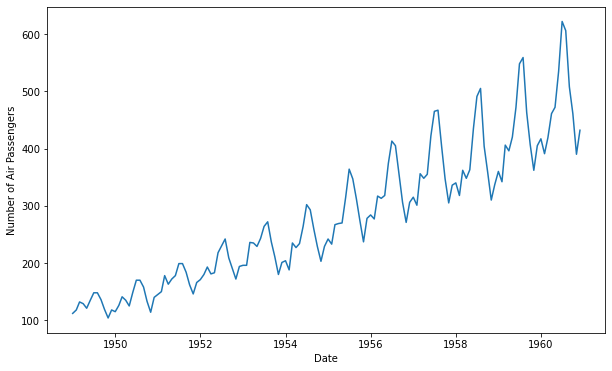

In [6]:
plt.xlabel("Date")
plt.ylabel("Number of Air Passengers")
plt.plot(indexedDataset);

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [7]:
#Determine rolling statistics

rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


- Plotting the Rolling Mean and Standard Deviation, which has window of 12.
- By looking below plot, we conclude that, it is non-stationary because mean and variance is not constant.

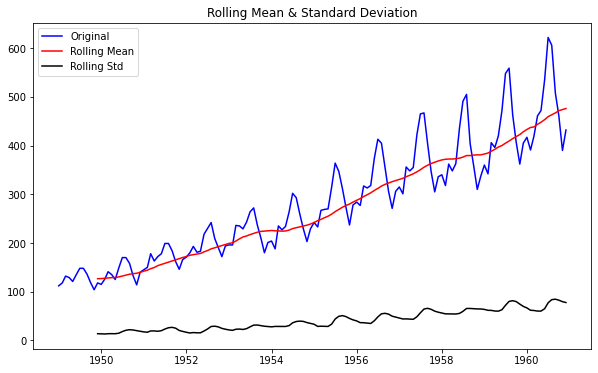

In [8]:
#Plot rolling statistics

orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean') 
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [9]:
#Perform Dickey-Fuller Test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest=adfuller(indexedDataset['Passengers'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

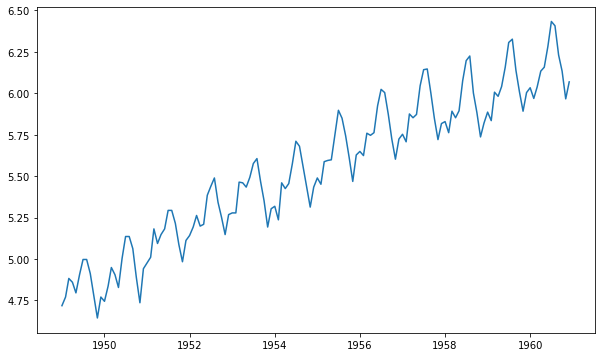

In [11]:
#Estimating trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale);

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again:

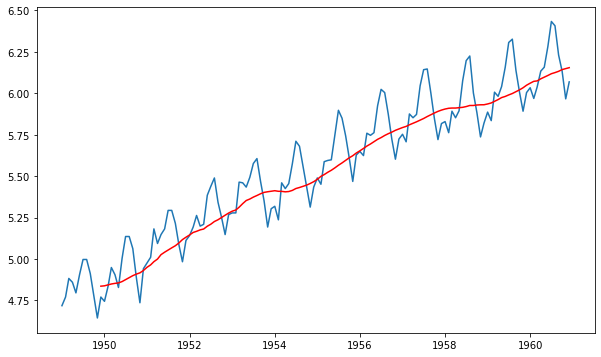

In [13]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');

- Using another method differencing, to make our time series stationary

In [14]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


- Output of differencing method, after dropping null values

In [15]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


- Defining function for Rolling Mean and Standard Deviation & ADF test

In [17]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics:
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean') 
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Dickey-Fuller Test:')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis because p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

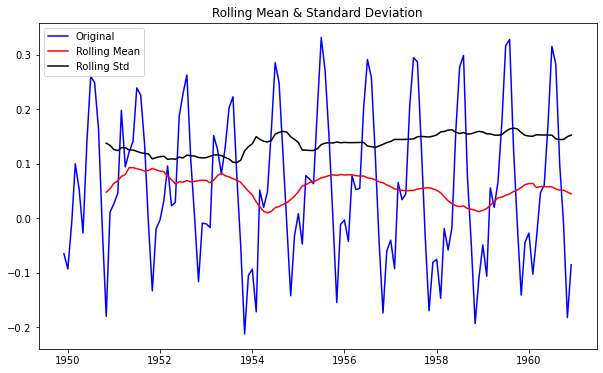

Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

- Checking for Trend stationarity and performing exponential transformation on our data

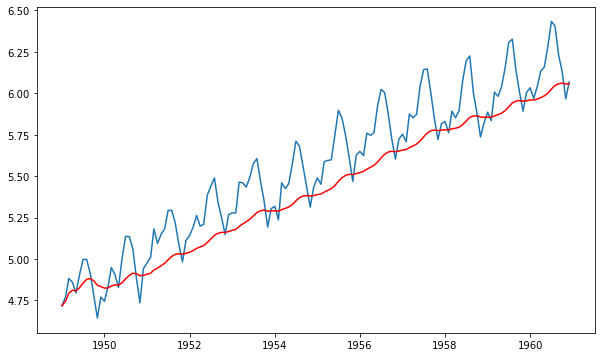

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red');

- Since log transformation is non-stationary, applying differencing on our data.

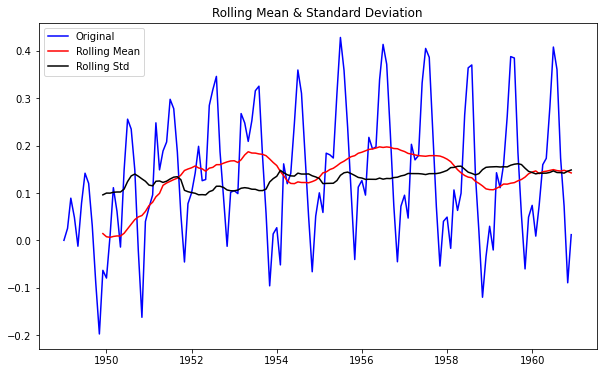

Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

- From above graph and ADF test, we conclude, it is trend stationary

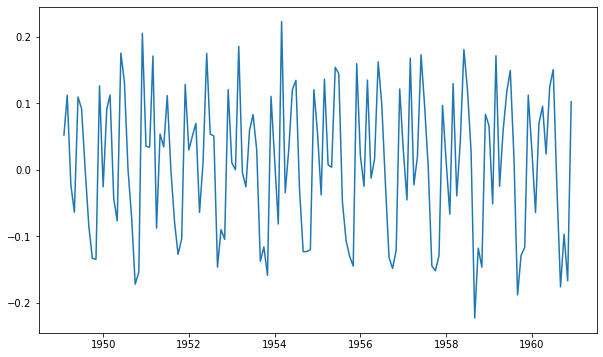

In [22]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

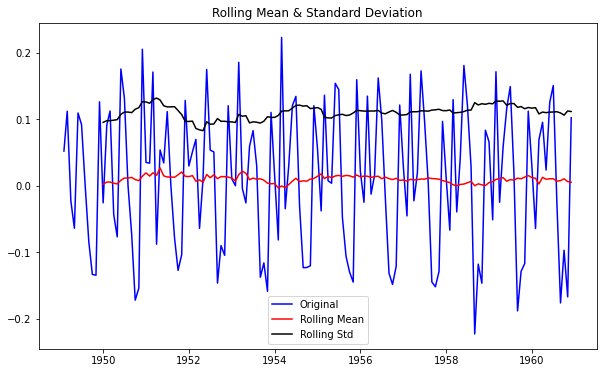

Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

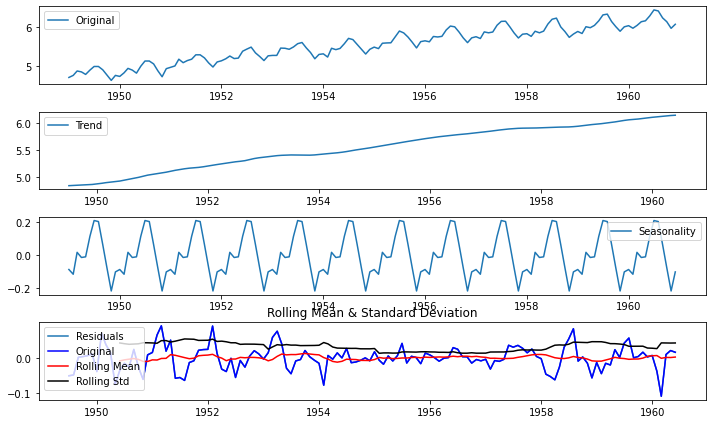

Dickey-Fuller Test:


KeyError: 'Passengers'

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

- Checking the stationarity of Time Series components

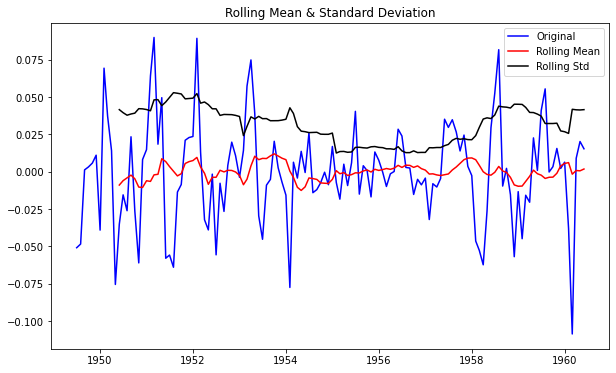

Dickey-Fuller Test:


KeyError: 'Passengers'

In [25]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

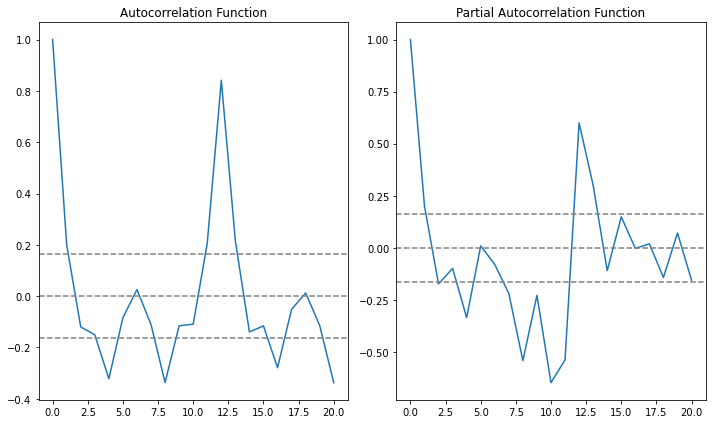

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(datasetLogDiffShifting, nlags=20, fft=False)
lag_pacf=pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- Building the ARIMA model with p=2, q=2 and I=1

C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, s

Plotting AR model


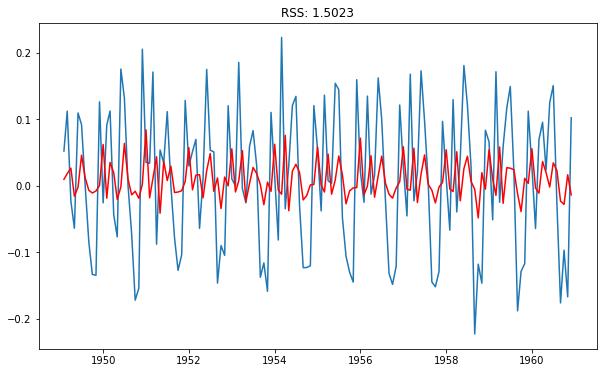

In [27]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR model')

C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


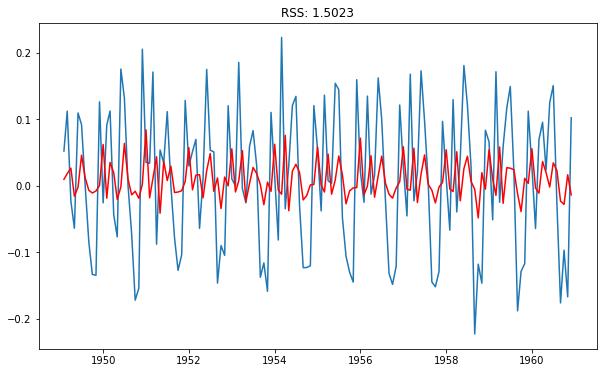

In [28]:
# MA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting MA model')

C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Alumno\anaconda3\envs\fastai\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
wa

Text(0.5, 1.0, 'RSS: 1.5023')

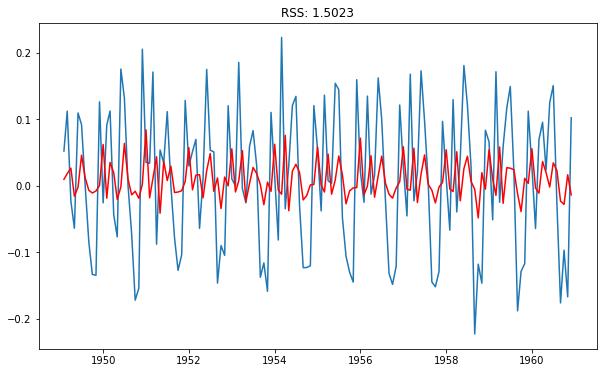

In [29]:
# MA Model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))

In [30]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [31]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


- Below is data display of predicted value in log scale

##### Editado por equipo de AI Saturdays Euskadi: .ix[0] ya no funciona dentro de Series, hay que usar .iloc[0,0].

In [32]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

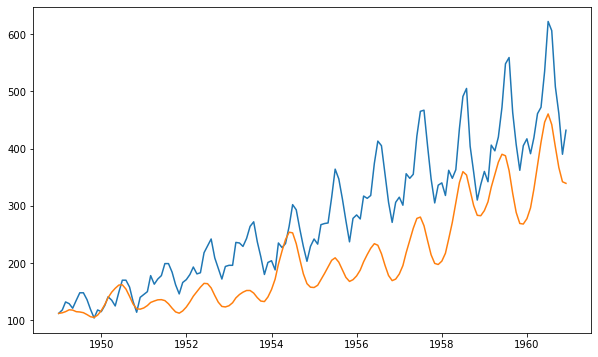

In [33]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

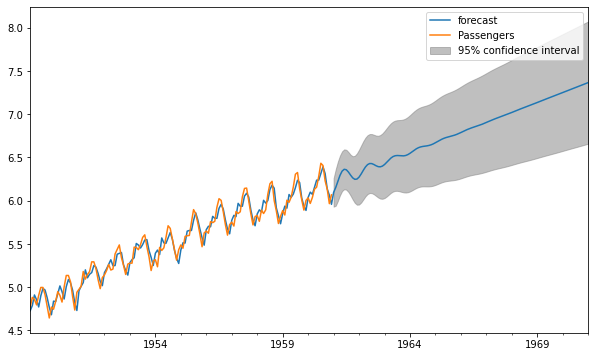

In [34]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)

- Next 10 years predicted value on log scale

In [35]:
x[1]

array([0.08384711, 0.1074946 , 0.11568692, 0.11702772, 0.11703494,
       0.11744015, 0.11762247, 0.1177871 , 0.1202416 , 0.12736039,
       0.13870956, 0.15118788, 0.16157808, 0.16834388, 0.17177323,
       0.17311976, 0.17358726, 0.17385453, 0.17430211, 0.17543326,
       0.17788141, 0.18195716, 0.1872621 , 0.19283385, 0.19769237,
       0.20130631, 0.20369047, 0.20519825, 0.20625261, 0.20720992,
       0.20836964, 0.2100032 , 0.21229737, 0.21524471, 0.21860172,
       0.22198248, 0.22503056, 0.22755287, 0.22954799, 0.2311479 ,
       0.23253818, 0.23390527, 0.23541303, 0.23718305, 0.23926531,
       0.2416153 , 0.24410363, 0.24656349, 0.24885248, 0.25089621,
       0.25269725, 0.2543162 , 0.25584304, 0.2573722 , 0.25898382,
       0.26072842, 0.2626154 , 0.26461082, 0.2666489 , 0.26865473,
       0.2705684 , 0.27236088, 0.27403693, 0.27562766, 0.27717821,
       0.27873519, 0.28033583, 0.2820001 , 0.28372674, 0.28549502,
       0.28727202, 0.28902337, 0.29072329, 0.29236075, 0.29394

In [36]:
len(x[1])

120

- Actual predicted value for next 10 years, after taking out log transformation

In [37]:
np.exp(x[0])

array([ 443.87099003,  470.03824289,  504.93496943,  540.45476366,
        567.73061229,  580.32799425,  577.00255506,  561.93878527,
        542.38460098,  525.5667201 ,  516.65911786,  518.14326391,
        529.93713427,  549.71671321,  573.3605858 ,  595.78887492,
        612.33136925,  620.24236826,  619.59541492,  613.03667712,
        604.59662101,  598.26640688,  596.94849901,  601.96242999,
        612.98280203,  628.25992341,  645.07990174,  660.46203696,
        671.98831861,  678.50382276,  680.39642262,  679.34135797,
        677.65965704,  677.58624332,  680.69829787,  687.61118506,
        697.93682815,  710.46197403,  723.50169971,  735.36367776,
        744.81244335,  751.39207899,  755.49842353,  758.18781341,
        760.81236415,  764.62058211,  770.44243321,  778.52280588,
        788.5163152 ,  799.6245693 ,  810.83619342,  821.20993342,
        830.12565988,  837.43162044,  843.44770334,  848.83396341,
        854.37743826,  860.76864877,  868.42971889,  877.43077